In [70]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
#         "text.color" : "w"
         }
plt.rcParams.update(params)

In [2]:
data_path = '../data/GoT/'

In [3]:
os.listdir(data_path)

['book3.csv', 'book2.csv', 'book5.csv', 'book1.csv', 'book4.csv']

In [4]:
l = [pd.read_csv(os.path.join(data_path,book)) for book in os.listdir(data_path)]

In [5]:
df_books = pd.concat(l)

In [6]:
df_books.book.value_counts(1)

3.0    0.257932
2.0    0.198055
5.0    0.194473
1.0    0.175026
4.0    0.174514
Name: book, dtype: float64

La carpeta datos/GoT del repositorio de la clase incluye los datos de co-ocurrencia de los personajes de Game of Thrones de los 5 libros. Se considera co-ocurrencia si los nombres de los personajes aparecen con menos de 15 palabras de separación.

In [7]:
df_books.sample(5)

,Source,Target,Type,weight,book
332,Cleos-Frey,Jaime-Lannister,Undirected,25,3.0
317,Craster,Samwell-Tarly,Undirected,10,2.0
393,Galazza-Galare,Hizdahr-zo-Loraq,undirected,12,5.0
256,Brynden-Tully,Tywin-Lannister,Undirected,4,3.0
135,Barristan-Selmy,Widower,undirected,3,5.0


In [8]:
df_books.dtypes

Source     object
Target     object
Type       object
weight      int64
book      float64
dtype: object

In [9]:
df_books.Type.value_counts()

Undirected    2467
undirected    1442
Name: Type, dtype: int64

In [10]:
df_books.drop(columns='Type',inplace=True)

#### 1. Obtener las medidas de centralidad para la red formada por la co-ocurrencia entre personajes, esto nos dará la 'importancia' de cada personaje. Realizar el cálculo para cada libro, con ello tendremos 5 valores por personaje para cada medida de centralidad.

In [25]:
def make_book_Graph(n):
    
    aux = df_books[df_books.book==n].reset_index(drop=True)
    book1 = nx.Graph()
    book1.add_edges_from(aux[['Source','Target']].values)
    for i,edge in aux.iterrows():
        book1[edge.Source][edge.Target]['weight'] = edge.weight
        
    dicts = [nx.degree_centrality(book1),nx.betweenness_centrality(book1),
             nx.pagerank(book1),nx.closeness_centrality(book1)]
    cols = ['degree_'+str(n),'betweennes_'+str(n),'pagerank_'+str(n),'closeness_'+str(n)]
    df_metrics = pd.DataFrame(data=dicts,index=cols).T
    df_metrics = df_metrics.sort_values(by=cols, ascending=False)
    return df_metrics

In [26]:
metrics_list = [make_book_Graph(x) for x in range(1,6)]

In [27]:
df_got = pd.concat(metrics_list,axis=1)

In [28]:
##numero de libros en los que aparece cada personaje
(df_got.count(axis=1)/3)

Eddard-Stark        6.666667
Robert-Baratheon    6.666667
Tyrion-Lannister    6.666667
Catelyn-Stark       6.666667
Jon-Snow            6.666667
                      ...   
Ezzara              1.333333
Lysono-Maar         1.333333
Old-Bill-Bone       1.333333
Larraq              1.333333
Widower             1.333333
Length: 796, dtype: float64

In [29]:
import seaborn as sns

<AxesSubplot:>

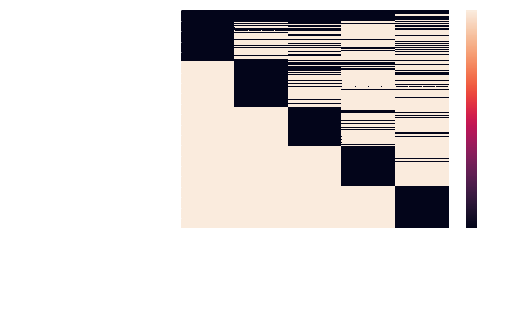

In [30]:
sns.heatmap(df_got.isna())

In [31]:
df_got.head(100)

,degree_1,betweennes_1,pagerank_1,closeness_1,degree_2,betweennes_2,pagerank_2,closeness_2,degree_3,betweennes_3,pagerank_3,closeness_3,degree_4,betweennes_4,pagerank_4,closeness_4,degree_5,betweennes_5,pagerank_5,closeness_5
Eddard-Stark,0.354839,0.269604,0.072362,0.563636,0.085271,0.067380,0.010640,0.457447,0.052980,0.019581,0.004871,0.426554,0.029304,0.004510,0.002612,0.334149,0.044304,0.073434,0.006469,0.376190
Robert-Baratheon,0.268817,0.214030,0.048494,0.545455,0.100775,0.153744,0.013364,0.448696,0.086093,0.166435,0.008394,0.438316,0.047619,0.014409,0.007118,0.351804,0.047468,0.177169,0.006430,0.400507
Tyrion-Lannister,0.247312,0.190212,0.043676,0.510989,0.205426,0.155338,0.046884,0.444062,0.195364,0.154091,0.036393,0.457576,0.095238,0.091159,0.012489,0.396226,0.104430,0.209616,0.028882,0.402548
Catelyn-Stark,0.231183,0.151395,0.034667,0.505435,0.127907,0.111218,0.021756,0.433613,0.125828,0.074938,0.018832,0.408660,0.040293,0.011729,0.005401,0.343396,0.003165,0.000000,0.000840,0.273593
Jon-Snow,0.198925,0.171581,0.047708,0.493369,0.108527,0.174439,0.028407,0.396923,0.172185,0.223829,0.037954,0.433908,0.040293,0.065803,0.009401,0.335381,0.196203,0.244849,0.059572,0.355056
Robb-Stark,0.188172,0.072984,0.029214,0.497326,0.135659,0.164438,0.023157,0.477778,0.162252,0.162321,0.027922,0.440233,0.025641,0.020781,0.003674,0.324614,0.031646,0.020078,0.004607,0.338692
Sansa-Stark,0.188172,0.037145,0.026945,0.489474,0.104651,0.054028,0.017003,0.430718,0.158940,0.089603,0.025732,0.424754,0.087912,0.152754,0.012997,0.370421,0.009494,0.000000,0.001213,0.293408
Bran-Stark,0.172043,0.055800,0.029770,0.486911,0.116279,0.113116,0.032093,0.414125,0.056291,0.040119,0.012578,0.398943,0.014652,0.002867,0.002520,0.297062,0.037975,0.040454,0.010154,0.308594
Cersei-Lannister,0.161290,0.026435,0.021620,0.484375,0.166667,0.063545,0.027451,0.430718,0.125828,0.024580,0.015746,0.406460,0.219780,0.275480,0.057348,0.420000,0.088608,0.155657,0.015888,0.398487
Joffrey-Baratheon,0.161290,0.018949,0.020672,0.480620,0.182171,0.090800,0.033525,0.438776,0.165563,0.141891,0.025867,0.474097,0.047619,0.014793,0.007044,0.345133,0.009494,0.000215,0.001551,0.297272


## 2. Para el paso anterior utiliza degree, betweenness y pagerank como medidas de centralidad. Intenta hallar algo que llame tu atención, por decir, algún personaje que tenga un degree bajo respecto a otros, pero un betwenness alto.

<AxesSubplot:>

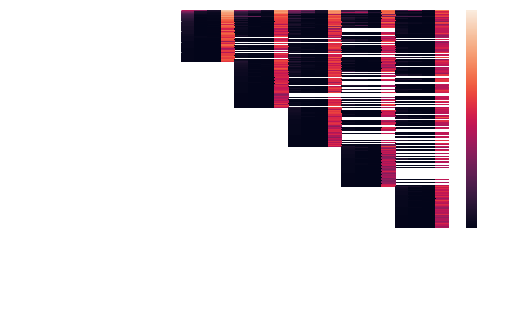

In [50]:
sns.heatmap(df_got)

In [51]:
df_got.describe()

,degree_1,betweennes_1,pagerank_1,closeness_1,degree_2,betweennes_2,pagerank_2,closeness_2,degree_3,betweennes_3,pagerank_3,closeness_3,degree_4,betweennes_4,pagerank_4,closeness_4,degree_5,betweennes_5,pagerank_5,closeness_5
count,187.000000,187.000000,187.000000,187.000000,259.000000,259.000000,259.000000,259.000000,303.000000,303.000000,303.000000,303.000000,274.000000,274.000000,274.000000,274.000000,317.000000,317.000000,317.000000,317.000000
mean,0.039331,0.010337,0.005348,0.354193,0.023166,0.009406,0.003861,0.300927,0.022031,0.007920,0.003300,0.303814,0.018235,0.010967,0.003650,0.261412,0.015174,0.008844,0.003155,0.269747
std,0.053256,0.034383,0.009183,0.062295,0.031560,0.029376,0.006116,0.050930,0.028909,0.026707,0.005000,0.049912,0.025154,0.035703,0.005693,0.051021,0.021560,0.038811,0.005428,0.039491
min,0.005376,0.000000,0.000932,0.211124,0.003876,0.000000,0.000724,0.172345,0.003311,0.000000,0.000612,0.179335,0.003663,0.000000,0.000723,0.136911,0.003165,0.000000,0.000620,0.174201
25%,0.005376,0.000000,0.001273,0.328913,0.007752,0.000000,0.001108,0.271008,0.006623,0.000000,0.001004,0.268325,0.003663,0.000000,0.001213,0.229412,0.006329,0.000000,0.001086,0.247455
50%,0.021505,0.000025,0.002448,0.348968,0.011628,0.000020,0.001869,0.302108,0.013245,0.000032,0.001753,0.306599,0.010989,0.000030,0.002096,0.263006,0.009494,0.000000,0.001736,0.264878
75%,0.043011,0.004677,0.004845,0.380368,0.025194,0.002829,0.003466,0.325758,0.026490,0.003886,0.003400,0.333702,0.021062,0.004554,0.003438,0.297062,0.015823,0.002604,0.003023,0.291244
max,0.354839,0.269604,0.072362,0.563636,0.205426,0.188170,0.046884,0.477778,0.195364,0.223829,0.037954,0.474097,0.234432,0.276306,0.057348,0.420000,0.196203,0.452831,0.059572,0.432285


array([[<AxesSubplot:title={'center':'degree_1'}>,
        <AxesSubplot:title={'center':'betweennes_1'}>,
        <AxesSubplot:title={'center':'pagerank_1'}>,
        <AxesSubplot:title={'center':'closeness_1'}>],
       [<AxesSubplot:title={'center':'degree_2'}>,
        <AxesSubplot:title={'center':'betweennes_2'}>,
        <AxesSubplot:title={'center':'pagerank_2'}>,
        <AxesSubplot:title={'center':'closeness_2'}>],
       [<AxesSubplot:title={'center':'degree_3'}>,
        <AxesSubplot:title={'center':'betweennes_3'}>,
        <AxesSubplot:title={'center':'pagerank_3'}>,
        <AxesSubplot:title={'center':'closeness_3'}>],
       [<AxesSubplot:title={'center':'degree_4'}>,
        <AxesSubplot:title={'center':'betweennes_4'}>,
        <AxesSubplot:title={'center':'pagerank_4'}>,
        <AxesSubplot:title={'center':'closeness_4'}>],
       [<AxesSubplot:title={'center':'degree_5'}>,
        <AxesSubplot:title={'center':'betweennes_5'}>,
        <AxesSubplot:title={'center':'

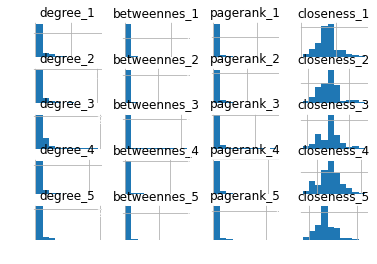

In [53]:
df_got.hist()

In [47]:
p = 'Eddard-Stark'
#p= 'Arya-Stark'
p='Mordane'
p='Jon-Snow'
s = pd.DataFrame(df_got.loc[p]).reset_index().rename(columns={'index':'metrica'})
s['book'] = s['metrica'].map(lambda x: x.split('_')[1])
s['metrica'] = s['metrica'].map(lambda x: x.split('_')[0])

In [48]:
s = s[~(s.metrica=='closeness')]

Text(0.5, 1.0, 'Jon-Snow metrics')

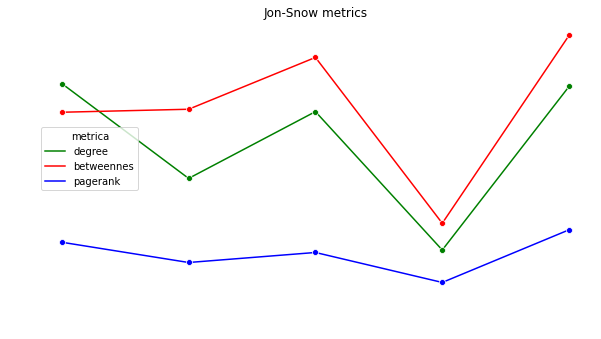

In [49]:
#df=tweetdatacom.groupby(["Time","Stock"])[["Text"]].count().reset_index()
plt.figure(figsize=(10,5))
line=sns.lineplot(x="book", y=p,hue="metrica",palette=["green","red",'blue'],marker="o",data=s)
plt.xticks(size=5, horizontalalignment='right',fontweight='light',fontsize='large')
plt.xlabel('Book',size=12)
plt.ylabel('',size=12)
plt.title(p+' metrics')

In [21]:
s

,metrica,Arya-Stark,book
0,degree,0.145161,1
1,betweennes,0.017495,1
2,pagerank,0.021499,1
3,degree,0.155039,2
4,betweennes,0.188170,2
5,pagerank,0.029019,2
6,degree,0.122517,3
7,betweennes,0.094787,3
8,pagerank,0.019424,3
9,degree,0.058608,4


### 3. Identifica los 3 personajes con la mayor variación en su importancia del libro 1 al 5. Utiliza esos 3 personajes y otros 5 de tu elección y grafica la evolución de la importancia de dichos personajes a través de los 5 libros. Utiliza el tipo de grafico que consideres más adecuado para representar la evolución. Ustedes elijan la métrica (medida de centralidad) que graficaran para este punto.

In [55]:
[x for x in df_got.columns if 'degree' in x]

['degree_1', 'degree_2', 'degree_3', 'degree_4', 'degree_5']

In [63]:
df_got['v_degree'] =  df_got[[x for x in df_got.columns if 'degree' in x]].var(axis=1)
df_got['v_betweennes'] =  df_got[[x for x in df_got.columns if 'betweennes' in x]].var(axis=1)
df_got['v_pagerank'] =  df_got[[x for x in df_got.columns if 'pagerank' in x]].var(axis=1)
df_got['v_closeness'] =  df_got[[x for x in df_got.columns if 'closeness' in x]].var(axis=1)

In [71]:
df_got[[x for x in df_got.columns if 'v_' in x]].describe(percentiles=np.arange(0,1,.1))

,v_degree,v_betweennes,v_pagerank,v_closeness
count,2.740000e+02,2.740000e+02,2.740000e+02,2.740000e+02
mean,5.191162e-04,5.352156e-04,1.989606e-05,1.722429e-03
std,1.579589e-03,2.400401e-03,7.189487e-05,2.067245e-03
min,1.076064e-08,0.000000e+00,2.173677e-13,1.804975e-07
0%,1.076064e-08,0.000000e+00,2.173677e-13,1.804975e-07
10%,1.168831e-06,0.000000e+00,6.655283e-08,8.492181e-05
20%,9.087838e-06,4.370126e-11,2.115898e-07,2.468763e-04
30%,1.942177e-05,7.287794e-09,4.400398e-07,4.503256e-04
40%,4.821196e-05,4.848492e-07,8.175955e-07,7.277465e-04
50%,8.341154e-05,3.679299e-06,1.407405e-06,9.711029e-04


Personajes cuya varianza está por encia de la de los demás

In [79]:
aux = df_got[(df_got.v_degree>0.0185) | (df_got.v_betweennes>0.03) | (df_got.v_pagerank>0.0008) | (df_got.v_closeness>0.013)]

In [80]:
aux

,degree_1,betweennes_1,pagerank_1,closeness_1,degree_2,betweennes_2,pagerank_2,closeness_2,degree_3,betweennes_3,pagerank_3,closeness_3,degree_4,betweennes_4,pagerank_4,closeness_4,degree_5,betweennes_5,pagerank_5,closeness_5,v_degree,v_betweennes,v_pagerank,v_closeness
Eddard-Stark,0.354839,0.269604,0.072362,0.563636,0.085271,0.067380,0.01064,0.457447,0.052980,0.019581,0.004871,0.426554,0.029304,0.004510,0.002612,0.334149,0.044304,0.073434,0.006469,0.376190,0.018645,0.011316,0.000885,0.007673
Luwin,0.096774,0.013183,0.012134,0.449275,0.046512,0.004826,0.01025,0.348649,0.003311,0.000000,0.000810,0.239873,0.003663,0.000000,0.001336,0.186858,NaN,NaN,NaN,NaN,0.001969,0.000039,0.000035,0.013638
Stannis-Baratheon,0.064516,0.000443,0.005650,0.401728,0.143411,0.119514,0.02883,0.415459,0.102649,0.109017,0.015241,0.438953,0.073260,0.276306,0.007722,0.369418,0.148734,0.452831,0.034819,0.432285,0.001507,0.030993,0.000166,0.000767


In [83]:
l_personajes = aux.index.to_list()
l_personajes =l_personajes+['Arya-Stark','Mordane','Jon-Snow']

In [84]:
l_personajes

['Eddard-Stark',
 'Luwin',
 'Stannis-Baratheon',
 'Arya-Stark',
 'Mordane',
 'Jon-Snow']

In [92]:
ax = df_got.loc[l_personajes,[x for x in df_got.columns if 'degree' in x]].reset_index().rename(columns={'index':'personaje'})
ax

,personaje,degree_1,degree_2,degree_3,degree_4,degree_5,v_degree
0,Eddard-Stark,0.354839,0.085271,0.052980,0.029304,0.044304,0.018645
1,Luwin,0.096774,0.046512,0.003311,0.003663,NaN,0.001969
2,Stannis-Baratheon,0.064516,0.143411,0.102649,0.073260,0.148734,0.001507
3,Arya-Stark,0.145161,0.155039,0.122517,0.058608,0.037975,0.002765
4,Mordane,0.059140,NaN,0.003311,NaN,NaN,0.001558
5,Jon-Snow,0.198925,0.108527,0.172185,0.040293,0.196203,0.004637


In [100]:
def df_book(n):
    df = ax[['personaje','degree_'+str(n)]]
    df['book'] = n
    df.rename(columns={'degree_'+str(n):'degree'},inplace = True)
    return df

In [104]:
S = pd.concat([df_book(x) for x in range(1,6)])

<ipython-input-100-7ec2af046b05>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['book'] = n
/home/jennifer/data_science/virtual_envs/ciencia_datos_venv/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [105]:
S

,personaje,degree,book
0,Eddard-Stark,0.354839,1
1,Luwin,0.096774,1
2,Stannis-Baratheon,0.064516,1
3,Arya-Stark,0.145161,1
4,Mordane,0.059140,1
5,Jon-Snow,0.198925,1
0,Eddard-Stark,0.085271,2
1,Luwin,0.046512,2
2,Stannis-Baratheon,0.143411,2
3,Arya-Stark,0.155039,2


Text(0.5, 1.0, 'degree')

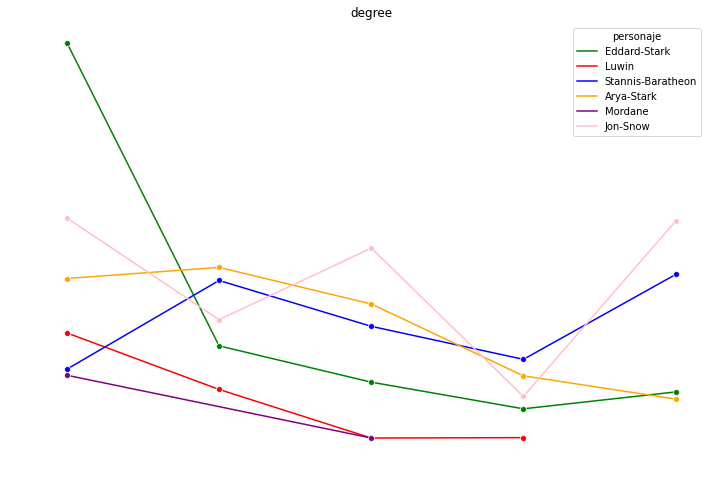

In [108]:
plt.figure(figsize=(12,8))
line=sns.lineplot(x="book", y='degree',hue="personaje",palette=["green","red",'blue','orange','purple','pink'],marker="o",data=S)
plt.xticks(size=5, horizontalalignment='right',fontweight='light',fontsize='large')
plt.xlabel('Book',size=12)
plt.ylabel('',size=12)
plt.title('degree')

### Opcional

 Graficar la red del libro de su elección considerando lo siguiente:
* Los colores de los nodos diferenciarlos por la Casa a la que pertenece el personaje
* El Tamaño de los nodos graficarlos de acuerdo a su importancia de acuerdo con la métrica que elijan

In [112]:
df_alle = pd.read_csv('../data/character-got.csv')[['Name','Allegiances']]

In [117]:
df_got.shape


(796, 24)

In [118]:
df_Name_Alleg = df_got.reset_index().rename(columns={'index':'Name'})[['Name']].merge(df_alle)

In [120]:
df_Name_Alleg.Allegiances.value_counts()

None               70
Night's Watch      38
Wildling           22
House Stark        20
Lannister          14
House Targaryen    12
House Greyjoy      10
Targaryen           6
Baratheon           6
House Lannister     6
Stark               4
House Martell       4
Greyjoy             4
House Arryn         3
House Tyrell        2
Arryn               1
Tully               1
Name: Allegiances, dtype: int64

In [181]:
aux = df_books[df_books.book==1].reset_index(drop=True)

In [182]:
df_name = pd.concat([aux[['Source']].rename(columns={'Source':'Name'}),aux[['Target']].rename(columns={'Target':'Name'})]).drop_duplicates()

In [183]:
df_name.reset_index(drop=True,inplace=True)

In [184]:
df_name.shape

(187, 1)

In [185]:
shape = df_name.merge(df_Name_Alleg).shape
shape, shape[0]/df_name.shape[0]

((65, 2), 0.34759358288770054)

In [189]:
df_name_casa = df_name.merge(df_Name_Alleg,how='left').fillna('None')

In [196]:
df_name_casa.Allegiances.value_counts()

None               130
House Stark         14
Night's Watch       14
Lannister            7
House Targaryen      6
Targaryen            4
House Lannister      4
House Arryn          3
Stark                2
Wildling             2
Arryn                1
Name: Allegiances, dtype: int64

In [197]:
book1 = nx.Graph()

In [198]:
book1.add_nodes_from(df_name_casa.Name)

In [199]:
book1.add_edges_from(aux[['Source','Target']].values)

In [200]:
for i,node in df_name_casa.iterrows():
    #print(edge.A,edge.B)
    book1.nodes[node.Name]['Allegiance'] = node.Allegiances
    #break

In [201]:
##agregar peso respecto a el numero de municipios en los que se presentan ambos bancos
for i,edge in aux.iterrows():
    #print(edge.A,edge.B)
    book1[edge.Source][edge.Target]['weight'] = edge.weight
    

In [202]:
dicts = [nx.degree_centrality(book1),nx.betweenness_centrality(book1),nx.pagerank(book1)]
cols = ['degree_'+str(1),'betweennes_'+str(1),'pagerank_'+str(1)]

In [203]:
df_metrics = pd.DataFrame(data=dicts,index=cols).T

In [204]:
df_metrics = df_metrics.sort_values(by=cols, ascending=False)
nodelist = df_metrics.index[:15].to_list()

In [205]:
df_metrics.loc['Addam-Marbrand']

degree_1        0.010753
betweennes_1    0.000000
pagerank_1      0.001276
Name: Addam-Marbrand, dtype: float64

In [214]:
d ={'None':1,
 'House Stark':2,
 "Night's Watch":3,
 'Lannister':4,
 'House Targaryen':5,
 'Targaryen':6,
 'House Lannister':7,
 'House Arryn':8,
 'Stark':9,
 'Wildling':10,
 'Arryn':11}

In [229]:
import matplotlib as mpl

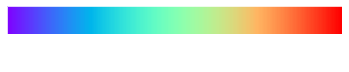

In [256]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = plt.cm.rainbow
norm = mpl.colors.Normalize(vmin=1, vmax=11)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal', label='Allegiances')

In [257]:
d

{'None': 1,
 'House Stark': 2,
 "Night's Watch": 3,
 'Lannister': 4,
 'House Targaryen': 5,
 'Targaryen': 6,
 'House Lannister': 7,
 'House Arryn': 8,
 'Stark': 9,
 'Wildling': 10,
 'Arryn': 11}

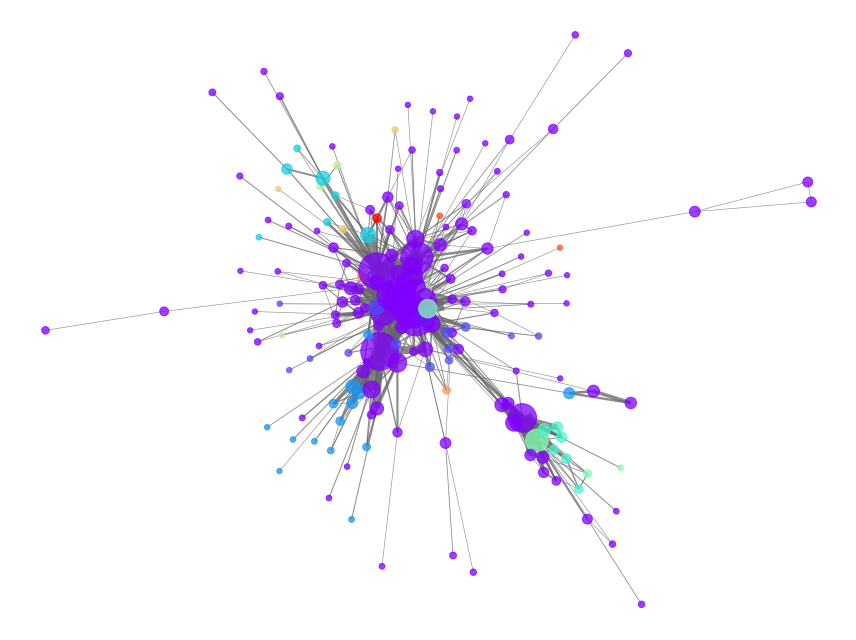

In [260]:
plt.figure(figsize =(12, 9)) 
  
node_color = [d[book1.nodes[x]['Allegiance']] for x in book1]
# node colour is a list of degrees of nodes 
  
#node_size = [1 * nx.get_node_attributes(book1, 'sucursales')[v] for v in book1] 
node_size = [30000 * df_metrics.loc[v].pagerank_1 for v in book1] 
# size of node is a list of population of cities 
  
edge_width = [0.2 * book1[u][v]['weight'] for u, v in book1.edges()] 
# width of edge is a list of weight of edges 
  
nx.draw_networkx(book1,
                 
                 node_size = node_size,  
                 node_color = node_color, 
                 alpha = 0.75, 
                 with_labels = False, 
                 width = edge_width, 
                 edge_color ='.4', 
                 cmap = plt.cm.rainbow) 
  
#plt.axis('off') 
plt.tight_layout(); 

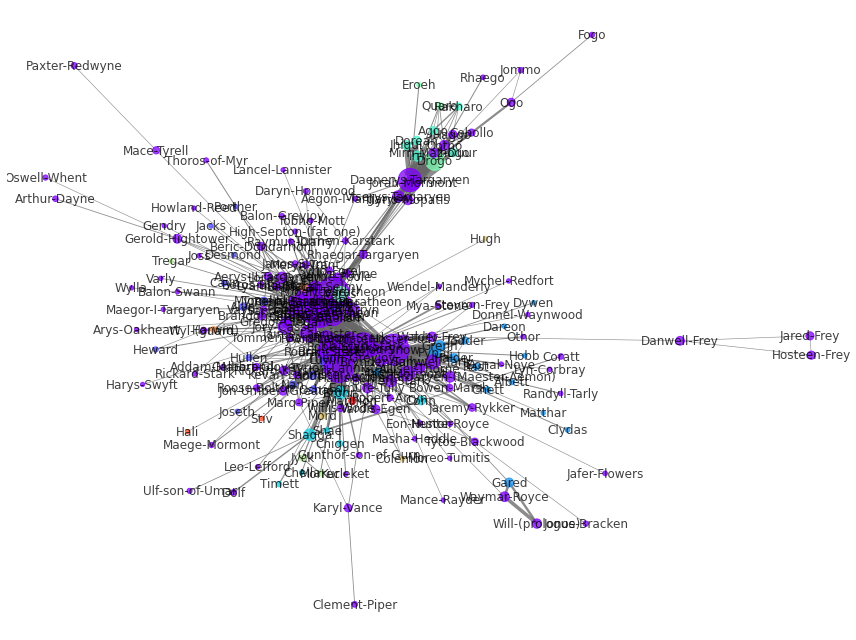

In [259]:
plt.figure(figsize =(12, 9)) 
  
node_color = [d[book1.nodes[x]['Allegiance']] for x in book1]
# node colour is a list of degrees of nodes 
  
#node_size = [1 * nx.get_node_attributes(book1, 'sucursales')[v] for v in book1] 
node_size = [20000 * df_metrics.loc[v].pagerank_1 for v in book1] 
# size of node is a list of population of cities 
  
edge_width = [0.2 * book1[u][v]['weight'] for u, v in book1.edges()] 
# width of edge is a list of weight of edges 
  
nx.draw_networkx(book1,
                 
                 node_size = node_size,  
                 node_color = node_color, 
                 alpha = 0.75, 
                 with_labels = True, 
                 width = edge_width, 
                 edge_color ='.4', 
                 cmap = plt.cm.rainbow) 
  
#plt.axis('off') 
plt.tight_layout(); 